## Task 5: TSF

## Anupam Prakash

In [1]:
#Importing all necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np
%matplotlib inline

## Reading Data

In [9]:
data = pd.read_csv('SampleSuperstore.csv')
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [10]:
data.info() #checking number of columns and rows and non null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [11]:
data.isnull().sum() # to check number of null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
data.duplicated().sum()

17

In [12]:
data.corr() # To relations between different coloumns

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [13]:
#Droping all unnecessary Columns
# Saving left columns in new dataframe
data.drop_duplicates(keep='first',inplace=True)
new_data=data.drop(['Country','Postal Code','Profit','Sales','Quantity','Discount'],axis=1)
new_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage


## Data Visualization 

##### Bargraph of Count values of different columns 

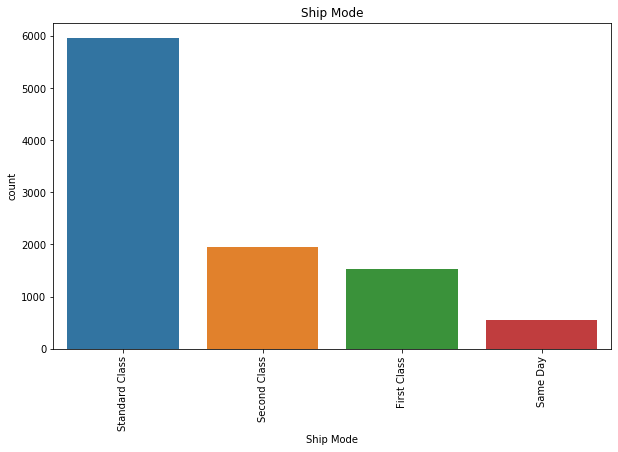

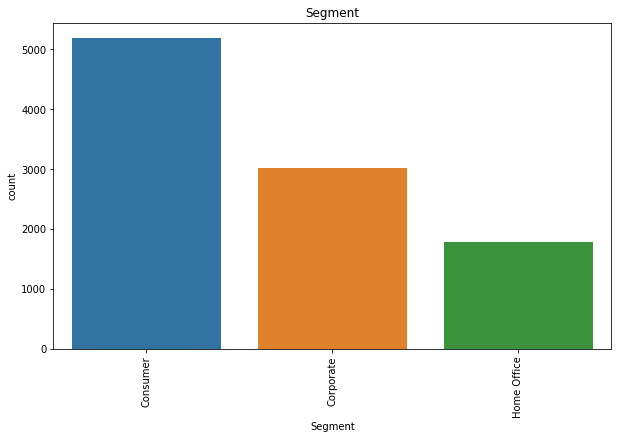

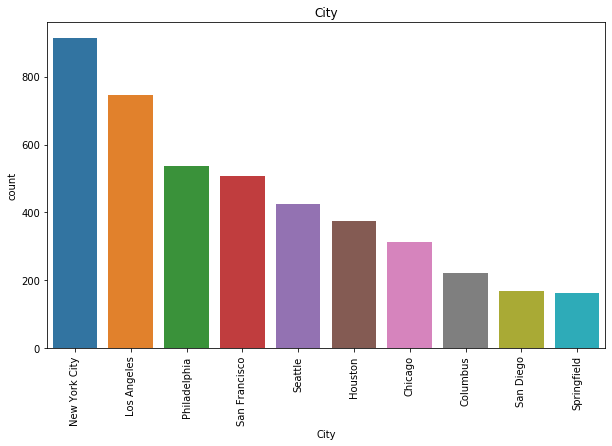

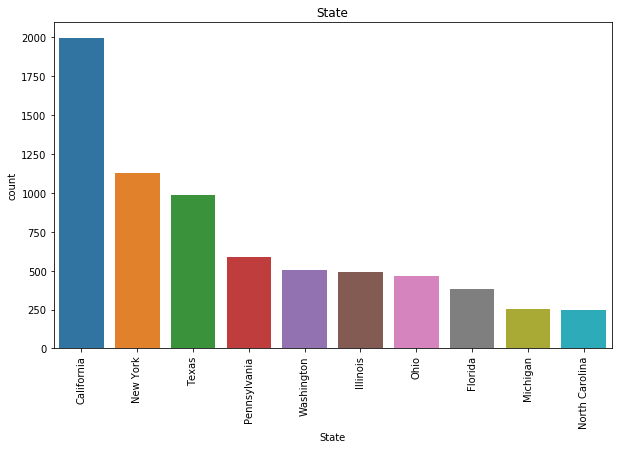

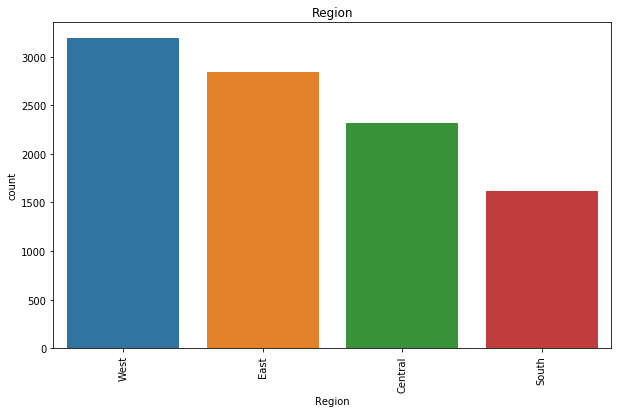

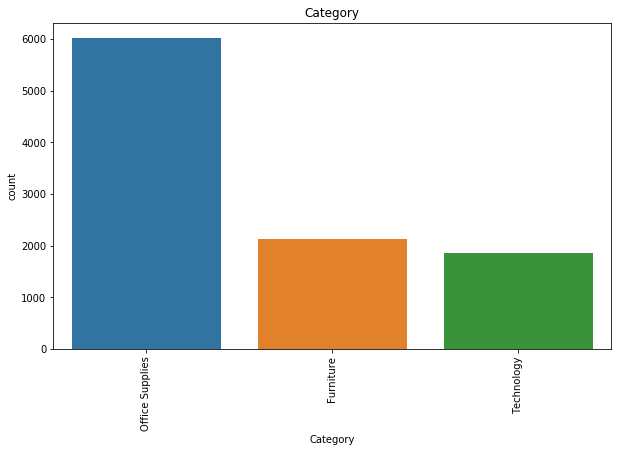

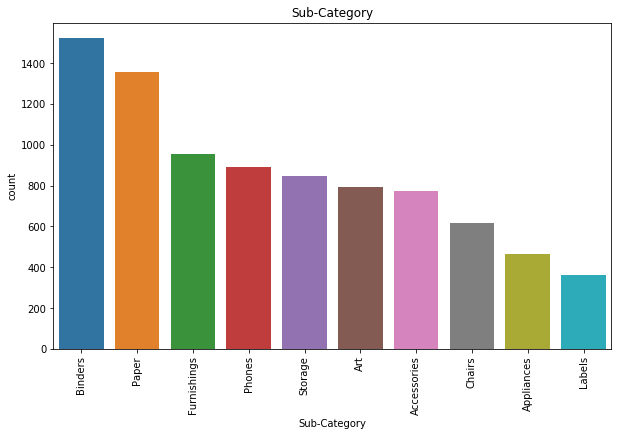

In [15]:
 col=list(new_data.columns)
for i in col:
    plt.figure(figsize=(10,6))
    sns.countplot(data[i],order=(data[i].value_counts().head(10)).index)
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

##### Pie chart visulization of different columns

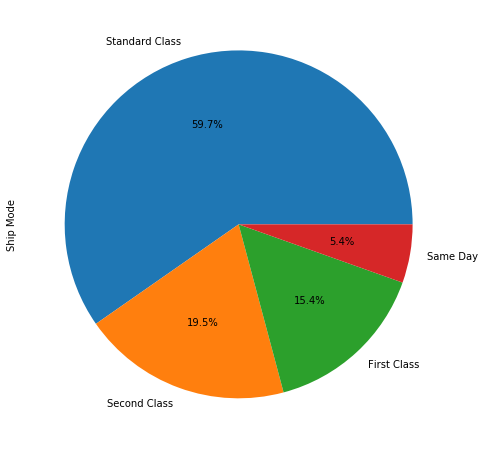

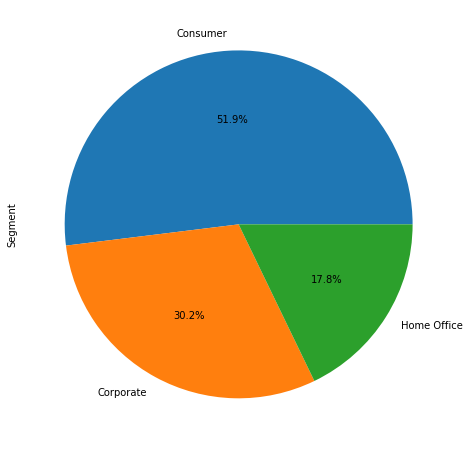

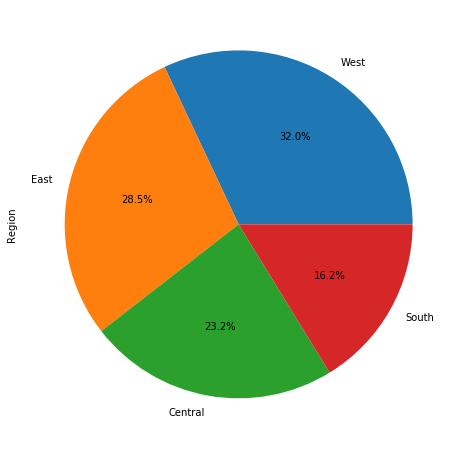

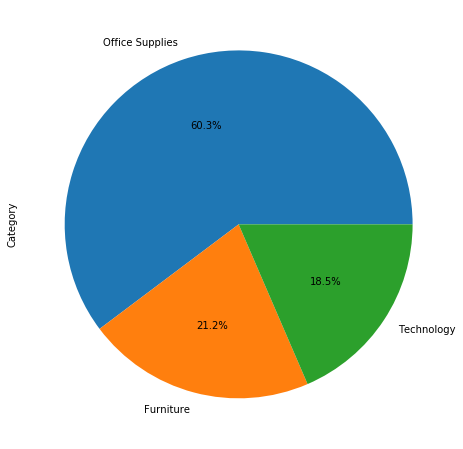

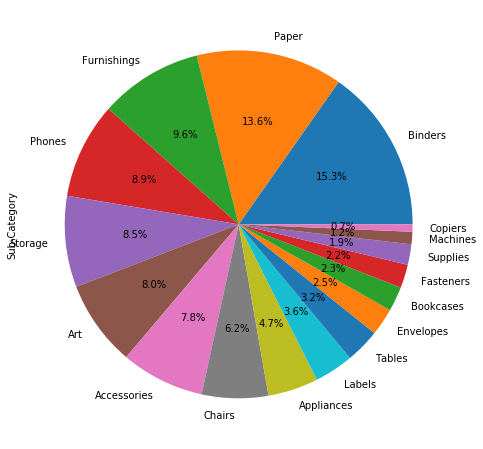

In [16]:
 col=list(new_data.columns)
for i in col:
    if(i=='City' or i=='State'):
        continue
    else:
        plt.figure(figsize=(12,8))
        data[i].value_counts().plot.pie(autopct='%1.1f%%')

        plt.show()

C:\Users\ANUPAM\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<Figure size 864x576 with 0 Axes>

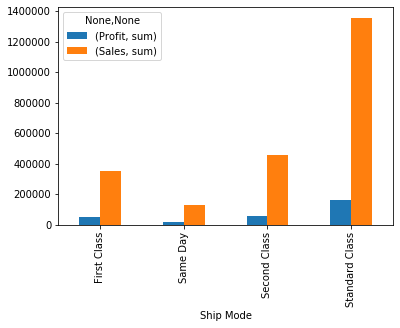

<Figure size 864x576 with 0 Axes>

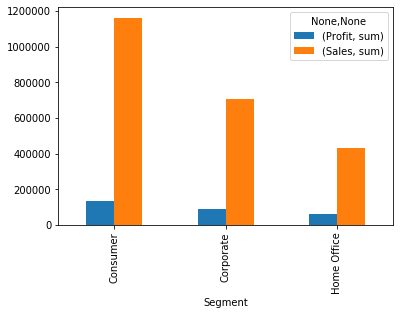

<Figure size 864x576 with 0 Axes>

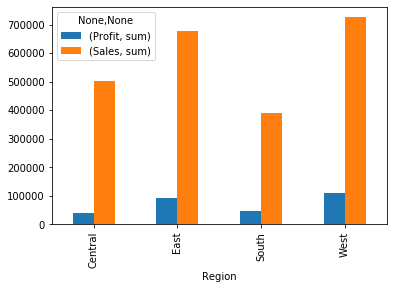

<Figure size 864x576 with 0 Axes>

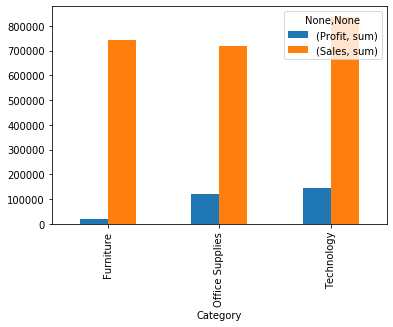

<Figure size 864x576 with 0 Axes>

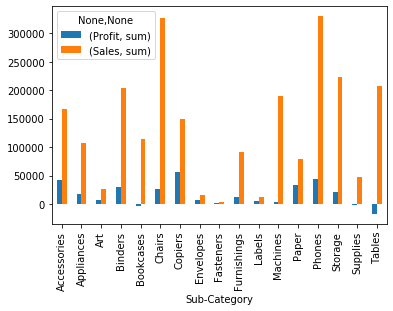

C:\Users\ANUPAM\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if sys.path[0] == '':
C:\Users\ANUPAM\anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  del sys.path[0]


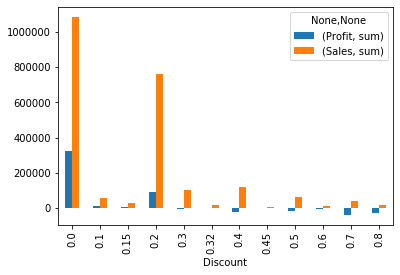

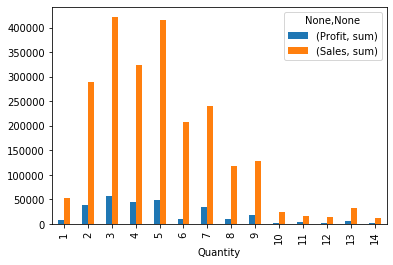

In [17]:
col=list(new_data.columns)
for i in col:
    
    if(i=='City' or i=='State'):
        continue
    else:
        plt.figure(figsize=(12,8))
        data.groupby(i)['Profit','Sales'].agg(['sum']).plot.bar()

        plt.show()

data.groupby('Discount')['Profit','Sales'].agg(['sum']).plot.bar()
data.groupby('Quantity')['Profit','Sales'].agg(['sum']).plot.bar()

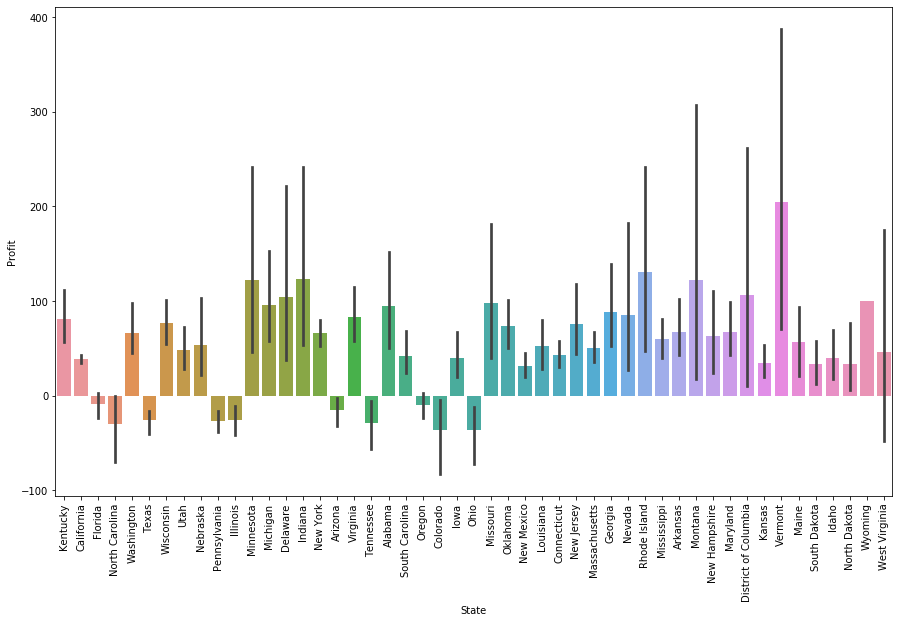

In [18]:
plt.figure(figsize=(15,9))
sns.barplot(x='State',y='Profit',data=data)
plt.xticks(rotation=90)
plt.show()

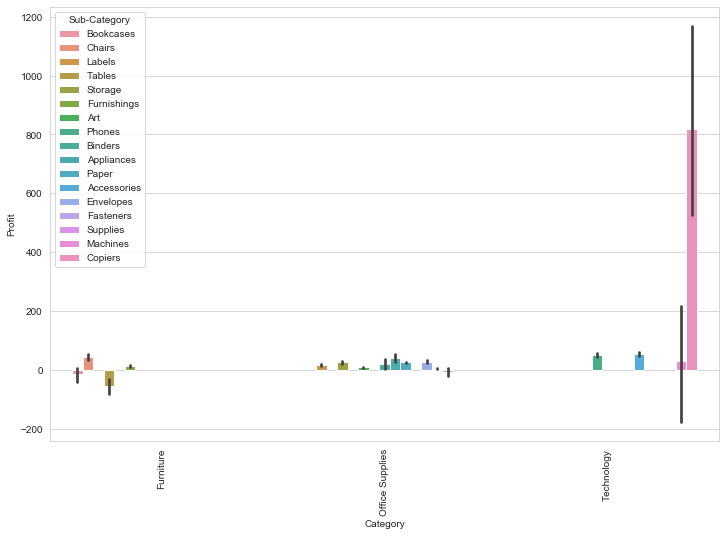

In [19]:
plt.figure(figsize=(12,8))
sns.set_style('whitegrid')
sns.barplot(x='Category',y='Profit',data=data,hue='Sub-Category')
plt.xticks(rotation=90)
plt.show()

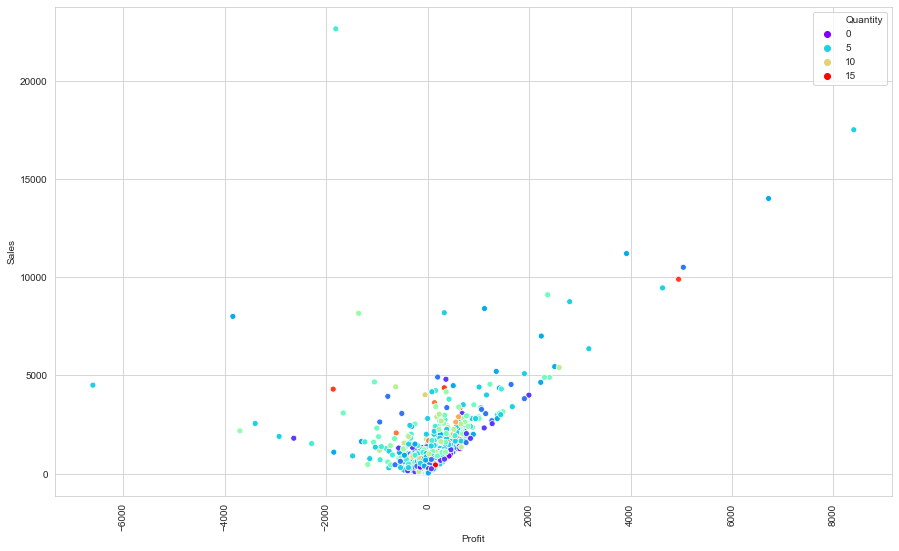

In [20]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Profit',y='Sales',data=data,hue='Quantity',palette='rainbow')
plt.xticks(rotation=90)
plt.show()

Scatter plot among sales and Profit By Quantity

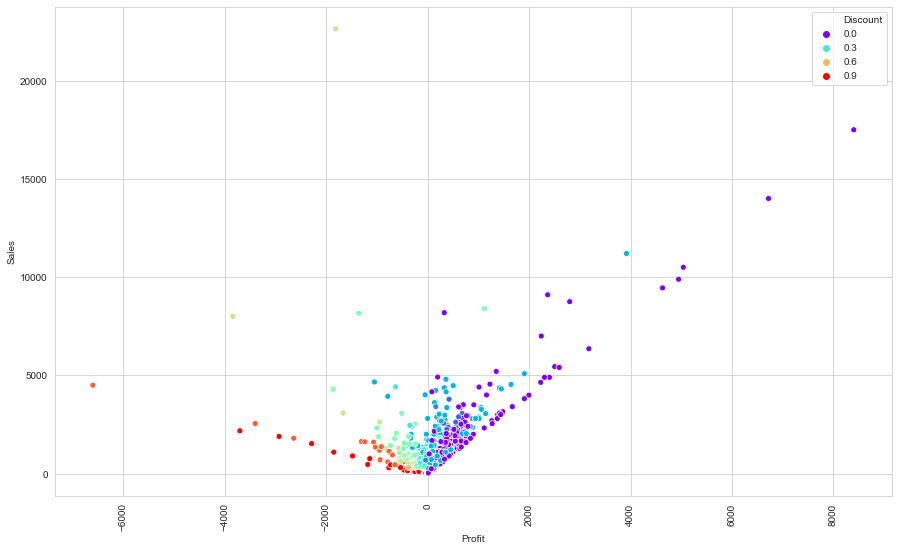

In [21]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Profit',y='Sales',data=data,hue='Discount',palette='rainbow')
plt.xticks(rotation=90)
plt.show()

##### Conclusion
1- More loss is hapeen when more discount is Given

2- Profit is maximum when no discount is given